In [14]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "city_data.csv"
ride_data = "ride_data.csv"

#Read data into DF
city = pd.read_csv("city_data.csv")
ride = pd.read_csv("ride_data.csv")
city= city.drop_duplicates("city", keep = "first")

# #merge
city_rides = city.merge(ride, on="city", how="left")
city_rides = city_rides.sort_values("city")
city_rides.head()

,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,1/11/2018 2:22,29.24,7.279900e+12
1522,Amandaburgh,12,Urban,2/10/2018 20:42,36.17,6.455620e+12
1529,Amandaburgh,12,Urban,3/13/2018 12:52,13.88,6.222130e+12
1524,Amandaburgh,12,Urban,1/21/2018 4:12,9.26,5.528430e+12
1525,Amandaburgh,12,Urban,4/19/2018 16:30,6.27,4.400630e+12


In [50]:
#urban info

urban_city = city_rides.loc[city_rides["type"]=="Urban"]
urban_city.sort_values("city")

#Calc Driver Count Per City, Urban
urban_drivers = urban_city["driver_count"].tolist()
urban_city.head()


,city,driver_count,type,date,fare,ride_id
1523,Amandaburgh,12,Urban,1/11/2018 2:22,29.24,7.279900e+12
1522,Amandaburgh,12,Urban,2/10/2018 20:42,36.17,6.455620e+12
1529,Amandaburgh,12,Urban,3/13/2018 12:52,13.88,6.222130e+12
1524,Amandaburgh,12,Urban,1/21/2018 4:12,9.26,5.528430e+12
1525,Amandaburgh,12,Urban,4/19/2018 16:30,6.27,4.400630e+12


In [56]:
#group urban city together
urban_group = urban_city.groupby("city")

# number of Rides and Avg Fare by urban cities
urban_rides = urban_group["type"].count()
    #print (urban_rides)

urban_fare = round(urban_group["fare"].mean(),2)
    #urban_fare

In [57]:
#Rural info
rural_city = city_rides.loc[city_rides["type"]=="Rural"]
rural_city.sort_values("city")

#Calc Driver Count in Rural
rural_drivers = rural_city["driver_count"].tolist()
rural_city.head()

,city,driver_count,type,date,fare,ride_id
2348,Bradshawfurt,7,Rural,4/8/2018 13:46,55.19,1.742950e+12
2349,Bradshawfurt,7,Rural,4/7/2018 21:12,49.70,5.088810e+12
2346,Bradshawfurt,7,Rural,3/24/2018 7:34,19.89,7.867400e+12
2344,Bradshawfurt,7,Rural,3/6/2018 21:44,19.74,6.080370e+12
2347,Bradshawfurt,7,Rural,2/18/2018 22:21,34.32,8.882000e+12


In [60]:
#group by rural
rural_group=rural_city.groupby("city")

# numb of rides N avg fare in rural areas
rural_rides = rural_group["type"].count()
    #rural_rides

rural_fare = round(rural_group["fare"].mean(),2)
    #rural_fare

In [61]:
#Suburban info
suburban_city = city_rides.loc[city_rides["type"]=="Suburban"]
suburban_city.sort_values("city")

#Calc Driver Count in Suburban
suburban_drivers= suburban_city["driver_count"].tolist()
suburban_city.head()

,city,driver_count,type,date,fare,ride_id
2050,Barronchester,11,Suburban,4/28/2018 11:49,39.19,9.917740e+12
2047,Barronchester,11,Suburban,3/20/2018 18:52,35.09,4.842150e+12
2048,Barronchester,11,Suburban,1/9/2018 9:01,38.57,1.246870e+12
2046,Barronchester,11,Suburban,3/26/2018 18:27,30.32,1.775560e+12
2045,Barronchester,11,Suburban,3/6/2018 6:36,46.07,4.553520e+12


In [62]:
# group suburban
suburban_group = suburban_city.groupby("city")

# number of Rides and Avg Fare in suburan cities
suburban_rides = suburban_group["type"].count()
    #suburban_rides

suburban_fare = round(suburban_group["fare"].mean(),2)
    #suburban_fare

## Bubble Plot of Ride Sharing Data

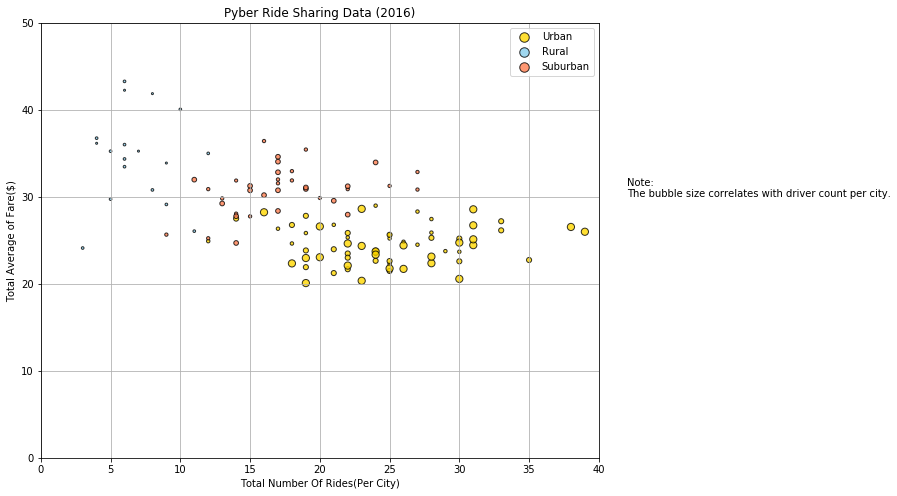

In [81]:
fig = plt.figure(figsize=(10,8))
plt.grid(True)

# Obtain the x and y coordinates for each of the three city types
#urban
plot_urban = plt.scatter(x=urban_rides,y=urban_fare,marker="o",
                        color="gold",s=90*urban_drivers,edgecolor='black', linewidths=1,alpha=0.8,label="Urban")
#rural
plot_rural = plt.scatter(x=rural_rides,y=rural_fare,marker="o",
                        color="skyblue",s=90*rural_drivers,edgecolor='black',linewidths=1,alpha=0.8,label="Rural")
#suburban
plot_sub = plt.scatter(x=suburban_rides,y=suburban_fare,marker="o",
                      color="coral",s=90*suburban_drivers,edgecolor='black',linewidths=1,alpha=0.8,label="Suburban")

#Create a legend
lgnd = plt.legend(handles=[plot_urban,plot_rural,plot_sub],loc="best")
lgnd.legendHandles[0]._sizes = [90]
lgnd.legendHandles[1]._sizes = [90]
lgnd.legendHandles[2]._sizes = [90]

# Incorporate a text label regarding circle size
plt.text(42,30,'Note:\nThe bubble size correlates with driver count per city.',fontsize=10)

#limits
plt.xlim(0,40)
plt.ylim(0,50)

#Labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number Of Rides(Per City)")
plt.ylabel("Average of Fare($)")

plt.show()


## Total Fares by City Type

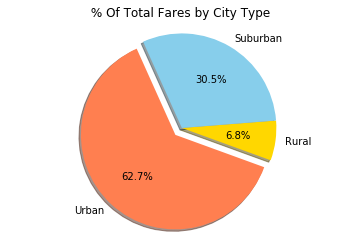

In [91]:
#Pie, Fares by City Type
fare_total = round(city_rides["fare"].sum(),2)

cities_grouped = city_rides.groupby("type")
city_fare_total = cities["fare"].sum()

# % of fare for type
percent_fare_type = [(x/fare_total)*100 for x in city_fare_total]

labels = ["Rural", "Suburban","Urban"]
colors = ["Gold", "skyBlue", "Coral"]
explode = [0, 0, 0.1]

plt.pie(percent_fare_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=340)

plt.title(" % Of Total Fares by City Type")
plt.axis("equal")
plt.show()

## Total Rides by City Type

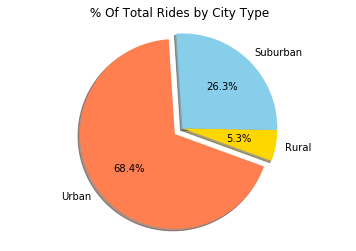

In [97]:
#count rides for all
ride_total= city_rides["ride_id"].count()

#fare for city type
ride_total_type = cities_grouped["ride_id"].count()

#% for city type
percent_ride_type = [(x/ride_total)*100 for x in ride_total_type]

labels = ["Rural", "Suburban","Urban"]
colors = ["Gold", "skyBlue", "Coral"]
explode = [0, 0, 0.1]

plt.pie(percent_ride_type, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=340)

plt.title(" % Of Total Rides by City Type")
plt.axis("equal")

plt.show()

## Total Drivers by City Type

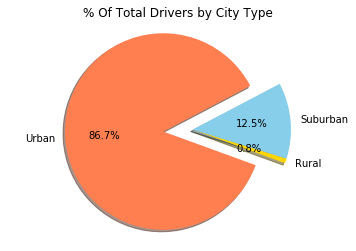

In [104]:
#total divers
driver_total = city_rides["driver_count"].sum()

# total drivers in diff areas
driver_type = cities_grouped["driver_count"].sum()

# % of drivers 
percent_drivers = [(x/driver_total)*100 for x in driver_type]

labels = ["Rural", "Suburban","Urban"]
colors = ["Gold", "skyBlue", "Coral"]
explode = [0, 0, 0.3]

plt.pie(percent_drivers, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=340)

plt.title("% Of Total Drivers by City Type")
plt.axis("equal")

plt.show()

Observations:
1) As shown in Pyber Ride Sharing Data (2016) there are less rides happening in the Rural areas but the fare is higher.
2) Refering back to Pyber Ride Sharing Data (2016) there are frequent rides happening in Urban areas but the fare could be a low as half the fare in a Rural area. 
3) As a result of higher usage in Urban and Suburban areas, there are is a signifcant difference in the percentage of drivers in the different city types. As showen in % Of Total Drivers by City Type pie chart.